<h1> The Best Neighborhoods for Expats to Live in Brussels</h1>

## Table of contents
* [Introduction/Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Results](#results)
* [Discussion](#discussion)
* [Conclusion](#conclusion)

## Part 1: Introduction/Business Problem <a name="introduction"></a>

<h3>1.1	Background</h3>

1.1	Background

Let’s briefly introduce Brussels: The beloved “Capital of Europe’, and the new homes for thousands of expats from all over the world.

Brussels is officially the Brussels-Capital Region, which comprising 19 municipalities, including the City of Brussels, which is the capital of Belgium. The Brussels-Capital Region is located in the central portion of the country and is a part of both the French Community of Belgium and the Flemish Community. Brussels has about 1.2 million inhabitants. [1]

**Brussels has become the administrative center of many international organizations.**

The European Union (EU), the North Atlantic Treaty Organisation (NATO) , the World Customs Organization and EUROCONTROL, as well as many international corporations. 
The presence of the EU and the other international bodies has led to there being more ambassadors and journalists in Brussels than in Washington D.C. The "international community" in Brussels numbers at least 70,000 people. [1]

<h3>1.2 Business Problem </h3>

Brussels is the capital of the Europe, a very busy city and have attracted thousands of internationals people, and especially, expats to stay.

Those expats are from different countries and have strong requests to find a comfortable, safe and affordable neighborhood to stay in.

<h3>1.3	Interests/ Stakeholders</h3>

International People, especially the expats. 

Stakeholders also include international organizations and companies, which have strong demands to look for houses in Brussels region for their expats.



## Introduction: Business Problem <a name="introduction"></a>

<h2>Part 2: Data</h2> <a name="data"></a>

<h3>2.1	Data Sources</h3>

<h4>- Background part/Municipalities/Postal code Data:</h4>

To achieve a general understanding of Brussels:  the municipalities, the population size, and the postal code of Brussels etc. 

<em>Data Sources:</em>
Wiki [1][2] and postal-codes.cybo.com [3]

<h4>- Jason Files : </h4>

To get the administrative divisions of Belgium. 
Level 2 divisions include the capital regions and the provinces. Level 4 divisions include Brussels’ municipalities. 

<em>Data Sources:</em>
Second-level Administrative Divisions, Belgium, 2015, from Spatial Data Repository of NYU [4]
Forth-level Administrative Divisions, Belgium, 2015 from Spatial Data Repository of NYU [5]


<h4>- FourSquare API: </h4>

To explore neighborhoods of Brussels. The data will be used to compare, segment and cluster neighborhoods.

<em>Data Sources:</em> FourSquare API [6]

<h4>- Brussels House Price, School Distributions, Crime Rates: </h4>

House prices, school distributions and crime rats of the Belgium region. These data will be used to address key factors influencing expats’ decision-making when choosing a neighborhood to live.

<em>Data Sources:</em> The Cost of Housing in Brussels, from KBCBrussles [7]
Expats: Where should you live in Brussels? [8] Brussels Schools [9] Brussels Crime Rats[10]

<h3>2.2	Data Selection</h3>

We dropped the Dutch names and keep the French name of the 19 municipalities of Brussels region, to avoid the possible name confusion. This selection also based that the Brussels region is a largely French speaking region. The only exception is the Crime Rate data, we used the Dutch name to create the choropleth map, as the json file used Dutch name.

We choose only to display the first rows of data due to the length of this report. For the fully detailed data, please refer to the github page.

## Part 3: Methodology and Analysis<a name="methodology"></a>

In this project, we need analyse the different neighborhoods of Brussels, and try to find **which neighborhoods** are the best matches for the **expats** in Brussels.  

We need identify the key concerns from expats point of view and to establish the most important criteria they apply when choosing a neighborhood to live in.


In the first step, we collected the **Location data** of the 19 municipalities in the Brussels Region.

We also collected location and category data **[the most common avenues of different neighborhoods]** from FourSquare.

The Second step is the **Exploratory Analysis**, including to **cluster and segment the neighborhoods**.

We used different **Statistics, One-Hot Coding, K-Means machine leaning, and different Visualization Tools**, like **Folium Maps** with **clusters** and **Choropleth Maps**, to help us to cluster, segment, and visualize the neighborhoods.

The final step is to analyze and categorize the different neighborhoods in Brussels region. We **joined** different data, and **segmented** the neighborhoods in different categories based on the **key criteria** related to choosing a neighborhood to live in.

In [1]:
# install packages
!pip install lxml
!pip install wikipedia

     |████████████████████████████████| 5.5MB 13.0MB/s eta 0:00:01
     |████████████████████████████████| 122kB 6.3MB/s eta 0:00:01
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/87/2a/18/4e471fd96d12114d16fe4a446d00c3b38fb9efcb744bd31f4a
Successfully built wikipedia


In [2]:
# import libaries
import wikipedia as wp
import pandas as pd

import requests
import io

!pip install bs4
from bs4 import BeautifulSoup

  Stored in directory: /home/jupyterlab/.cache/pip/wheels/a0/b0/b2/4f80b9456b87abedbc0bf2d52235414c3467d8889be38dd472
Successfully built bs4


In [3]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes #
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs:
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    geopy-2.0.0                |     pyh9f0ad1d_0          63 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          97 KB

The following NEW packages will be INSTALLED:

  geographiclib      conda-forge/noarch::geographiclib-1.50-py_0
  geopy              conda-forge/noarch::geopy-2.0.0-pyh9f0ad1d_0



geopy-2.0.0          | 63 KB     | ##################################### | 100% 
geographiclib-1.50   | 34 KB     | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: d

In [4]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.3.3


 ## Exploratory Data Analysis 

### A. Load and explore the data


Welcome to Brussels! Brussels is the capital of Belgium. 
Before we explore Brussels, let' get an overall impression about Belgium as a country.

We get this second level of administrative data from NYU Spatial Data Repository. 


In [5]:
# Second level of administrative data 
with open('Belgium_2.json') as json_data:
    be2_data = json.load(json_data)

Let's take a quick look at the data.


In [6]:
be2_data

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'id': 'jp810pg7549.1',
   'geometry': {'type': 'MultiPolygon',
    'coordinates': [[[[4.40986347, 50.90990448],
       [4.41250563, 50.90923691],
       [4.42184687, 50.90971375],
       [4.42692137, 50.90330124],
       [4.42829895, 50.90052414],
       [4.42867613, 50.89823532],
       [4.42855215, 50.89598846],
       [4.42997599, 50.89466476],
       [4.43126678, 50.89382172],
       [4.43164968, 50.89334869],
       [4.43174601, 50.89277267],
       [4.43139791, 50.89186859],
       [4.43083382, 50.89128494],
       [4.42911673, 50.88990402],
       [4.4286499, 50.88928986],
       [4.4284234, 50.88867188],
       [4.42845345, 50.88778687],
       [4.42892838, 50.88679504],
       [4.42939663, 50.88638306],
       [4.43053436, 50.88571548],
       [4.43096256, 50.88530731],
       [4.43392134, 50.88145065],
       [4.43535137, 50.87981796],
       [4.43575144, 50.87878036],
       [4.43561983, 50.87775803],
       

Notice how all the relevant data is in the _features_ key. So, let's define a new variable that includes this data.


In [7]:
b_data = be2_data['features']

Let's take a look at the first item in this list.

In [8]:
b_data[0]

{'type': 'Feature',
 'id': 'jp810pg7549.1',
 'geometry': {'type': 'MultiPolygon',
  'coordinates': [[[[4.40986347, 50.90990448],
     [4.41250563, 50.90923691],
     [4.42184687, 50.90971375],
     [4.42692137, 50.90330124],
     [4.42829895, 50.90052414],
     [4.42867613, 50.89823532],
     [4.42855215, 50.89598846],
     [4.42997599, 50.89466476],
     [4.43126678, 50.89382172],
     [4.43164968, 50.89334869],
     [4.43174601, 50.89277267],
     [4.43139791, 50.89186859],
     [4.43083382, 50.89128494],
     [4.42911673, 50.88990402],
     [4.4286499, 50.88928986],
     [4.4284234, 50.88867188],
     [4.42845345, 50.88778687],
     [4.42892838, 50.88679504],
     [4.42939663, 50.88638306],
     [4.43053436, 50.88571548],
     [4.43096256, 50.88530731],
     [4.43392134, 50.88145065],
     [4.43535137, 50.87981796],
     [4.43575144, 50.87878036],
     [4.43561983, 50.87775803],
     [4.43522835, 50.87713623],
     [4.43491173, 50.87686157],
     [4.43422318, 50.87651062],
     [4.4

#### Tranform the data into a _pandas_ dataframe


The next task is essentially transforming this data of nested Python dictionaries into a _pandas_ dataframe. So let's start by creating an empty dataframe.


In [9]:
# define the dataframe columns
column_names = ['Region','Province','Latitude', 'Longitude'] 

# instantiate the dataframe
df_be = pd.DataFrame(columns=column_names)

Take a look at the empty dataframe to confirm that the columns are as intended.


In [10]:
df_be

,Region,Province,Latitude,Longitude


Then let's loop through the data and fill the dataframe one row at a time.


In [11]:
for data in b_data:
    region = data['properties']['name_1'] 
    province = data['properties']['name_2']
        
    b_latlon = data['geometry']['coordinates']
    latitude = b_latlon[0][0][0][0]
    longitude = b_latlon[0][0][0][1]
    
    df_be = df_be.append({'Region': region,
                    'Province': province,
                    'Latitude': latitude,
                    'Longitude': longitude}, ignore_index=True)

now we get an overall impression about Belgium as a country.

In [12]:
df_be

,Region,Province,Latitude,Longitude
0,Bruxelles,Bruxelles,4.409863,50.909904
1,Vlaanderen,Antwerpen,4.963096,51.454395
2,Vlaanderen,Limburg,5.788506,50.772232
3,Vlaanderen,Oost-Vlaanderen,4.232577,51.355682
4,Vlaanderen,Vlaams Brabant,5.159651,51.032955
5,Vlaanderen,West-Vlaanderen,3.368916,51.361553
6,Wallonie,Brabant Wallon,4.804756,50.789082
7,Wallonie,Hainaut,3.749187,50.765469
8,Wallonie,Liège,5.709728,50.740765
9,Wallonie,Limburg,5.229424,50.722065


We can see Belgium is divided into 3 regions: Brussles, Vlaanderen(Flemish speaking part), and Wallonie(French speaking part)

Ok, after the nationtal impression, Let's focus on Brussels now. <br>

In [13]:
# Get the municipalities data of Brussels from wiki
html=wp.page("List of municipalities of the Brussels-Capital Region").html().encode("UTF-8")

In [14]:
df_bru=pd.read_html(html,header =0)[1] # The second table is what we need.
df_bru.head()

,Unnamed: 0,French name,Dutch name,Flag,CoA,postcode,Population(1/1/2017),Area,Population density(kmÂ²),Ref.
0,1,Anderlecht,Anderlecht,NaN,NaN,1070,118241,2 (6.8 sq mi),6680,[7]
1,2,Auderghem,Oudergem,NaN,NaN,1160,33313,2 (3.5 sq mi),3701,[8]
2,3,Berchem-Sainte-Agathe,Sint-Agatha-Berchem,NaN,NaN,1082,24701,2 (1.1 sq mi),8518,[9]
3,4,Ville de Bruxelles*,Stad Brussel*,NaN,NaN,1000102010301040105011201130,176545,2 (12.6 sq mi),5415,[10]
4,5,Etterbeek,Etterbeek,NaN,NaN,1040,47414,2 (1.2 sq mi),15295,[11]


Since Brussels is a largely French speaking region, we decided to keep the French name, and drop the Dutch name. Here is a reference for the French and Dutch name.  

In [15]:
# French name and Dutch name for reference
bru_name=df_bru[['French name','Dutch name']]
bru_name

,French name,Dutch name
0,Anderlecht,Anderlecht
1,Auderghem,Oudergem
2,Berchem-Sainte-Agathe,Sint-Agatha-Berchem
3,Ville de Bruxelles*,Stad Brussel*
4,Etterbeek,Etterbeek
5,Evere,Evere
6,Forest,Vorst
7,Ganshoren,Ganshoren
8,Ixelles,Elsene
9,Jette,Jette


Let's check some important datas about Brussels region

In [16]:
# Let's get ride of unneccary columns
df_bru=df_bru.drop(columns=['Unnamed: 0','Dutch name','Flag','CoA','Ref.'])
# get ride of extra postcode
df_bru['postcode']=df_bru['postcode'].str[:4]
# Take out the * after Ville de Bruxelles
df_bru['French name']=df_bru['French name'].replace({'\*':''},regex=True)
# Set the table columns in a clean way
df_bru.columns=['Neighborhood','Postalcode','Population','Area','PopulationDensity']
df_bru.head()

,Neighborhood,Postalcode,Population,Area,PopulationDensity
0,Anderlecht,1070,118241,2 (6.8 sq mi),6680
1,Auderghem,1160,33313,2 (3.5 sq mi),3701
2,Berchem-Sainte-Agathe,1082,24701,2 (1.1 sq mi),8518
3,Ville de Bruxelles,1000,176545,2 (12.6 sq mi),5415
4,Etterbeek,1040,47414,2 (1.2 sq mi),15295


In [17]:
#Ok, since we already got a overall impression about the Brussels Municipalites.
#let's focus on the specific datas we need and get ride of more columns
df_bru=df_bru.drop(columns=['Population','Area','PopulationDensity'])
df_bru['Municipalities']=df_bru['Neighborhood']
df_bru.head()


,Neighborhood,Postalcode,Municipalities
0,Anderlecht,1070,Anderlecht
1,Auderghem,1160,Auderghem
2,Berchem-Sainte-Agathe,1082,Berchem-Sainte-Agathe
3,Ville de Bruxelles,1000,Ville de Bruxelles
4,Etterbeek,1040,Etterbeek


In [18]:
# Let's reset the column order
df_bru=df_bru[['Postalcode','Neighborhood','Municipalities']]
df_bru.head()

,Postalcode,Neighborhood,Municipalities
0,1070,Anderlecht,Anderlecht
1,1160,Auderghem,Auderghem
2,1082,Berchem-Sainte-Agathe,Berchem-Sainte-Agathe
3,1000,Ville de Bruxelles,Ville de Bruxelles
4,1040,Etterbeek,Etterbeek


In [19]:
print('The dataframe has {} municipalities.'.format(
        len(df_bru['Neighborhood'].unique()),
        df_bru.shape[0]
    )
)

The dataframe has 19 municipalities.


Ok, we learned that Brussels have 19 muninipalities, or 19 neighborhoods.
Where we can recommendate to our expats to live. 

Let's check the largest groups of foreign residents in Brussels

In [20]:
# Reading URL through pandas
bru_data= pd.read_html(r'https://en.wikipedia.org/wiki/Brussels#Municipalities')

# Checking how many tables are within the specified URL
print(len(bru_data))

#Largest Foreign Residents in Brussels(2019)
bru_data[4].head()

57


,0,1
0,France,64218
1,Romania,41858
2,Morocco,34984
3,Italy,33718
4,Spain,28480


In [21]:
# read data to pd dataframe
bru_f = pd.DataFrame(data=bru_data[4])
# set columns
bru_f.columns=['Countries','Population']
# drop rows contains unsuitable data
bru_f.drop([10,11],inplace=True)
# set index
bru_f.set_index('Countries',inplace=True)
bru_f.head(10)

,Population
Countries,
France,64218
Romania,41858
Morocco,34984
Italy,33718
Spain,28480
Poland,23182
Portugal,19440
Bulgaria,12143
Germany,10674


In [22]:
# Numric data befroe plot the data
bru_f['Population']=bru_f.apply(pd.to_numeric)

In [23]:
# Let's visualize the first 10 foreigh residents countires 
topf=bru_f.head(10)
topf

,Population
Countries,
France,64218
Romania,41858
Morocco,34984
Italy,33718
Spain,28480
Poland,23182
Portugal,19440
Bulgaria,12143
Germany,10674


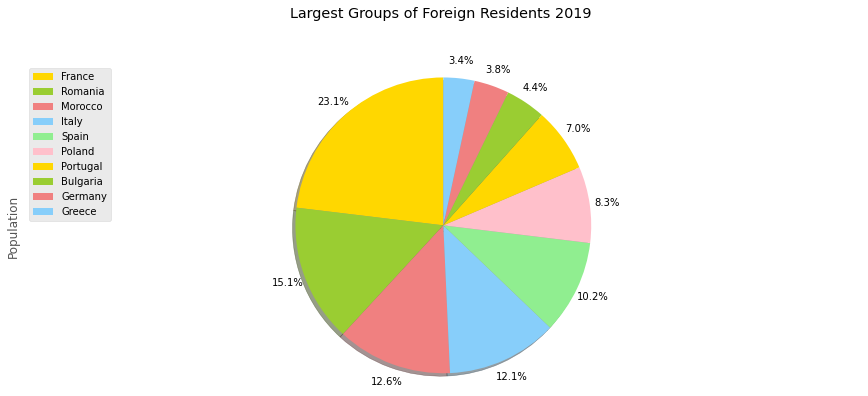

In [24]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] # ratio for each continent with which to offset each wedge.

topf['Population'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            #explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Largest Groups of Foreign Residents 2019 ', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=topf.index, loc='upper left') 

plt.show()

## B. FourSquare

In order to utilize the FourSquare location data, 
we need to get the latitue and the longitude coordinates of each neighbourhood

In [25]:
# install packages

!pip install geopy
!pip install geocoder

# import libraries
import geocoder

     |████████████████████████████████| 102kB 16.0MB/s ta 0:00:01


Let's get the latitude and longitude of the 19 municipalites of Brussels.

In [26]:
latitude=[]
longitude=[]
for code in df_bru['Postalcode']:
    g = geocoder.arcgis('{}, Brussels, Belgium'.format(code))
    print(code, g.latlng)
    while (g.latlng is None):
        g = geocoder.arcgis('{}, Brussels, Belgium'.format(code))
        print(code, g.latlng)
    latlng = g.latlng
    latitude.append(latlng[0])
    longitude.append(latlng[1])

1070 [50.82892500000003, 4.289680126000064]
1160 [50.81067115700006, 4.437785000000076]
1082 [50.86506500000007, 4.293590675000075]
1000 [50.84597344700006, 4.366800000000069]
1040 [50.83400500000005, 4.394063524000046]
1140 [50.86764500000004, 4.408936256000061]
1190 [50.814050000000066, 4.323960968000051]
1083 [50.87382500000007, 4.308504074000041]
1050 [50.82055500000007, 4.388028489000021]
1090 [50.87948000000006, 4.328710877000049]
1081 [50.86248000000006, 4.32821720000004]
1080 [50.857485000000054, 4.313741243000038]
1060 [50.83065000000005, 4.344906037000044]
1210 [50.853485000000035, 4.371489064000059]
1030 [50.86222500000008, 4.379957004000062]
1180 [50.790395000000046, 4.359917764000045]
1170 [50.79368000000005, 4.427958692000061]
1200 [50.84853500000003, 4.435333090000029]
1150 [50.833515000000034, 4.438357296000049]


In [27]:
# write to dataframe

latlng_df= pd.DataFrame([latitude,longitude],['Latitude','Longitude']).T
latlng_df.head()

,Latitude,Longitude
0,50.828925,4.289680
1,50.810671,4.437785
2,50.865065,4.293591
3,50.845973,4.366800
4,50.834005,4.394064


In [28]:
# Merge with df_bru
df_bru=pd.concat([df_bru,latlng_df],axis=1)
df_bru.head()

,Postalcode,Neighborhood,Municipalities,Latitude,Longitude
0,1070,Anderlecht,Anderlecht,50.828925,4.289680
1,1160,Auderghem,Auderghem,50.810671,4.437785
2,1082,Berchem-Sainte-Agathe,Berchem-Sainte-Agathe,50.865065,4.293591
3,1000,Ville de Bruxelles,Ville de Bruxelles,50.845973,4.366800
4,1040,Etterbeek,Etterbeek,50.834005,4.394064


Ok, now we get the data we want, let's go to next step.

## Explore and Cluster the neighbourhoods in Brussel

#### Use geopy library to get the latitude and longitude values of Brussels.


In order to define an instance of the geocoder, we need to define a user_agent. We will name our agent <em>be_explorer</em>, as shown below.


In [29]:
address = 'Brussels, BE'

geolocator = Nominatim(user_agent="be_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Brussels are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Brussels are 50.8436709, 4.3674366933879565.


#### Create a map of Brussels with neighborhoods superimposed on top.


In [30]:
# create map of New York using latitude and longitude values
map_brussels = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, municipalities, neighborhood in zip(df_bru['Latitude'], df_bru['Longitude'], df_bru['Municipalities'], df_bru['Neighborhood']):
    label = '{}, {}'.format(neighborhood, municipalities)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_brussels)  
    
map_brussels

Brussels is Fun! Let's segment and cluster and find the best neighborhoods for the expats.


#### Define Foursquare Credentials and Version


In [31]:
CLIENT_ID = 'WELB51YA2HIE14RFYQKKXRQBVWVIXJSZBZI5AIIH4RPDBGVJ' # your Foursquare Secret
CLIENT_SECRET='DPOYUWLNZOHP5BPT1KY2OYQNWRMQAGUOZ0TC05S1FO2OBJZ1'
VERSION = '20200605'
LIMIT = 100
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: WELB51YA2HIE14RFYQKKXRQBVWVIXJSZBZI5AIIH4RPDBGVJ
CLIENT_SECRET:DPOYUWLNZOHP5BPT1KY2OYQNWRMQAGUOZ0TC05S1FO2OBJZ1


#### Let's explore the first neighborhood in our dataframe.


Get the neighborhood's name.


In [32]:
df_bru.loc[0, 'Neighborhood']

'Anderlecht'

Get the neighborhood's latitude and longitude values.


In [33]:
neighborhood_latitude = df_bru.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = df_bru.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = df_bru.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Anderlecht are 50.82892500000003, 4.289680126000064.


#### Now, let's get the top 100 venues that are in Anderlecht within a radius of 500 meters.


First, let's create the GET request URL. Name your URL **url**.


In [34]:
LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

 # create URL
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID,CLIENT_SECRET,VERSION,neighborhood_latitude,neighborhood_longitude,radius,LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=WELB51YA2HIE14RFYQKKXRQBVWVIXJSZBZI5AIIH4RPDBGVJ&client_secret=DPOYUWLNZOHP5BPT1KY2OYQNWRMQAGUOZ0TC05S1FO2OBJZ1&v=20200605&ll=50.82892500000003,4.289680126000064&radius=500&limit=100'

Send the GET request and examine the resutls


In [35]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5fdb0a78a06d855f1b46d0a2'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Scherdemael',
  'headerFullLocation': 'Scherdemael, Brussels',
  'headerLocationGranularity': 'neighborhood',
  'totalResults': 20,
  'suggestedBounds': {'ne': {'lat': 50.83342500450003,
    'lng': 4.29679116501806},
   'sw': {'lat': 50.824424995500024, 'lng': 4.282569086982068}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4ee8e2b8991154b31c9d9827',
       'name': 'Gym Fit',
       'location': {'address': 'Avenue Marius Renard 24A',
        'lat': 50.827160814914805,
        'lng': 4.286131942326034,
        'labeledLatLngs': [{'label': 'display',
          'lat': 5

We know that all the information is in the _items_ key. Before we proceed, let's get the **get_category_type** function.


In [36]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Now we are ready to clean the json and structure it into a _pandas_ dataframe.


In [37]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Gym Fit,Gym,50.827161,4.286132
1,Boulangerie Sorgeloos,Bakery,50.829891,4.287208
2,Parc Marius Renard,Park,50.828202,4.285771
3,Physical Team/Krav Maga HQ,Martial Arts School,50.832094,4.292284
4,L'Hydromel,Gastropub,50.827378,4.287711


And how many venues were returned by Foursquare?


In [38]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

20 venues were returned by Foursquare.


#### Let's create a function to repeat the same process to all the neighborhoods in Brussels


In [39]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(CLIENT_ID,CLIENT_SECRET,VERSION,lat,lng,radius,LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

#### Now write the code to run the above function on each neighborhood and create a new dataframe called b_venues.


In [40]:

b_venues = getNearbyVenues(names=df_bru['Neighborhood'],
                                   latitudes=df_bru['Latitude'],
                                   longitudes=df_bru['Longitude']
                                  )


Anderlecht
Auderghem
Berchem-Sainte-Agathe
Ville de Bruxelles
Etterbeek
Evere
Forest
Ganshoren
Ixelles
Jette
Koekelberg
Molenbeek-Saint-Jean
Saint-Gilles
Saint-Josse-ten-Noode
Schaerbeek
Uccle
Watermael-Boitsfort
Woluwe-Saint-Lambert
Woluwe-Saint-Pierre


#### Let's check the size of the resulting dataframe


In [41]:
print(b_venues.shape)
b_venues.head()

(521, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Anderlecht,50.828925,4.28968,Gym Fit,50.827161,4.286132,Gym
1,Anderlecht,50.828925,4.28968,Boulangerie Sorgeloos,50.829891,4.287208,Bakery
2,Anderlecht,50.828925,4.28968,Parc Marius Renard,50.828202,4.285771,Park
3,Anderlecht,50.828925,4.28968,Physical Team/Krav Maga HQ,50.832094,4.292284,Martial Arts School
4,Anderlecht,50.828925,4.28968,L'Hydromel,50.827378,4.287711,Gastropub


Let's check how many venues were returned for each neighborhood


In [42]:
b_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Anderlecht,20,20,20,20,20,20
Auderghem,15,15,15,15,15,15
Berchem-Sainte-Agathe,12,12,12,12,12,12
Etterbeek,40,40,40,40,40,40
Evere,29,29,29,29,29,29
Forest,13,13,13,13,13,13
Ganshoren,18,18,18,18,18,18
Ixelles,40,40,40,40,40,40
Jette,32,32,32,32,32,32


From above table, we can pay attention 
that Stad Brussels seems the most fun place returned the most venues!

#### Let's find out how many unique categories can be curated from all the returned venues


In [43]:
print('There are {} uniques categories.'.format(len(b_venues['Venue Category'].unique())))

There are 145 uniques categories.


145 categories! Brussels is indeed a busy city!

## Analyze Each Neighborhood


In [44]:
# one hot encoding
b_onehot = pd.get_dummies(b_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
b_onehot['Neighborhood'] = b_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [b_onehot.columns[-1]] + list(b_onehot.columns[:-1])
b_onehot = b_onehot[fixed_columns]

b_onehot.head()

,Neighborhood,African Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bar,Beer Bar,Beer Garden,Beer Store,Belgian Restaurant,Bike Rental / Bike Share,Bookstore,Botanical Garden,Boutique,Brasserie,Brewery,Burger Joint,Bus Station,Bus Stop,Butcher,Café,Castle,Cheese Shop,Chinese Restaurant,Chocolate Shop,Clothing Store,Coffee Shop,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Eastern European Restaurant,Electronics Store,Escape Room,Event Service,Event Space,Falafel Restaurant,Farmers Market,Food Court,Food Service,Food Truck,Football Stadium,French Restaurant,Fried Chicken Joint,Friterie,Furniture / Home Store,Gaming Cafe,Garden,Gastropub,Gourmet Shop,Greek Restaurant,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Health Food Store,History Museum,Hockey Field,Hookah Bar,Hostel,Hotel,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Italian Restaurant,Japanese Restaurant,Juice Bar,Kebab Restaurant,Kids Store,Lebanese Restaurant,Lounge,Market,Martial Arts School,Men's Store,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Moroccan Restaurant,Movie Theater,Museum,Music Venue,Notary,Office,Park,Pastry Shop,Performing Arts Venue,Pet Store,Pharmacy,Piano Bar,Pizza Place,Platform,Playground,Plaza,Pool,Pool Hall,Portuguese Restaurant,Print Shop,Ramen Restaurant,Restaurant,Salad Place,Sandwich Place,Scandinavian Restaurant,Seafood Restaurant,Shopping Mall,Skate Park,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,Spa,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Tanning Salon,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Track,Trail,Train Station,Tram Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Volleyball Court,Wine Bar,Women's Store
0,Anderlecht,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Anderlecht,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Anderlecht,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Anderlecht,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Anderlecht,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


And let's examine the new dataframe size.


In [45]:
b_onehot.shape

(521, 146)

#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category


In [46]:
b_grouped = b_onehot.groupby('Neighborhood').mean().reset_index()
b_grouped

,Neighborhood,African Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,BBQ Joint,Bakery,Bar,Beer Bar,Beer Garden,Beer Store,Belgian Restaurant,Bike Rental / Bike Share,Bookstore,Botanical Garden,Boutique,Brasserie,Brewery,Burger Joint,Bus Station,Bus Stop,Butcher,Café,Castle,Cheese Shop,Chinese Restaurant,Chocolate Shop,Clothing Store,Coffee Shop,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Diner,Eastern European Restaurant,Electronics Store,Escape Room,Event Service,Event Space,Falafel Restaurant,Farmers Market,Food Court,Food Service,Food Truck,Football Stadium,French Restaurant,Fried Chicken Joint,Friterie,Furniture / Home Store,Gaming Cafe,Garden,Gastropub,Gourmet Shop,Greek Restaurant,Grocery Store,Gun Range,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Health Food Store,History Museum,Hockey Field,Hookah Bar,Hostel,Hotel,Ice Cream Shop,Indian Restaurant,Indonesian Restaurant,Italian Restaurant,Japanese Restaurant,Juice Bar,Kebab Restaurant,Kids Store,Lebanese Restaurant,Lounge,Market,Martial Arts School,Men's Store,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Moroccan Restaurant,Movie Theater,Museum,Music Venue,Notary,Office,Park,Pastry Shop,Performing Arts Venue,Pet Store,Pharmacy,Piano Bar,Pizza Place,Platform,Playground,Plaza,Pool,Pool Hall,Portuguese Restaurant,Print Shop,Ramen Restaurant,Restaurant,Salad Place,Sandwich Place,Scandinavian Restaurant,Seafood Restaurant,Shopping Mall,Skate Park,Smoke Shop,Snack Place,Soccer Field,Soccer Stadium,Spa,Sporting Goods Shop,Sports Bar,Sports Club,Stadium,Steakhouse,Supermarket,Sushi Restaurant,Tanning Salon,Tapas Restaurant,Tea Room,Tennis Court,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Track,Trail,Train Station,Tram Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Volleyball Court,Wine Bar,Women's Store
0,Anderlecht,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.100000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000,0.000,0.00000,0.000000,0.000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.050000,0.000000,0.000000,0.000000,0.000,0.050000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000,0.000000,0.00000,0.050000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.050000,0.000000,0.150000,0.000000,0.000000,0.05,0.050000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000,0.000000,0.000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.050000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.100000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000
1,Auderghem,0.000000,0.00000,0.00000,0.000000,0.066667,0.000000,0.066667,0.000000,0.00000,0.000000,0.000000,0.066667,0.00000,0.000000,0.000000,0.000000,0.066667,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000,0.000,0.00000,0.000000,0.000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.000000,0.00000,0.000000,0.066667,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000,0.000000,0.066667,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.000000,0.000000,0.000000,0.066667,0.000000,0.00000,0.000000,0.000000,0.000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.

#### Let's confirm the new size


In [47]:
b_grouped.shape

(18, 146)

#### Let's print each neighborhood along with the top 5 most common venues


In [48]:
num_top_venues = 5

for hood in b_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = b_grouped[b_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Anderlecht----
          venue  freq
0          Park  0.15
1      Bus Stop  0.10
2   Supermarket  0.10
3        Bakery  0.10
4  Tram Station  0.10


----Auderghem----
               venue  freq
0       Soccer Field  0.20
1              Plaza  0.07
2     Gymnastics Gym  0.07
3  French Restaurant  0.07
4              Track  0.07


----Berchem-Sainte-Agathe----
              venue  freq
0       Supermarket  0.17
1  Greek Restaurant  0.17
2       Snack Place  0.08
3            Notary  0.08
4      Burger Joint  0.08


----Etterbeek----
         venue  freq
0        Plaza  0.12
1  Pizza Place  0.08
2  Snack Place  0.08
3         Park  0.05
4  Supermarket  0.05


----Evere----
                venue  freq
0  Athletics & Sports  0.10
1                Park  0.10
2        Tram Station  0.07
3             Stadium  0.07
4         Supermarket  0.07


----Forest----
                venue  freq
0                Park  0.15
1            Bus Stop  0.08
2          Steakhouse  0.08
3  Chinese Restauran

#### Let's put that into a _pandas_ dataframe


First, let's write a function to sort the venues in descending order.


In [49]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.


In [50]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = b_grouped['Neighborhood']

for ind in np.arange(b_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(b_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Anderlecht,Park,Bus Stop,Supermarket,Tram Station,Bakery,Convenience Store,Soccer Field,Notary,Martial Arts School,Gastropub
1,Auderghem,Soccer Field,Track,Brasserie,Tennis Court,Belgian Restaurant,French Restaurant,Plaza,Garden,Gymnastics Gym,Bakery
2,Berchem-Sainte-Agathe,Greek Restaurant,Supermarket,Tram Station,Notary,Snack Place,Gym,French Restaurant,Restaurant,Plaza,Burger Joint
3,Etterbeek,Plaza,Pizza Place,Snack Place,Park,Gym / Fitness Center,Supermarket,Indian Restaurant,Concert Hall,Butcher,Chinese Restaurant
4,Evere,Athletics & Sports,Park,Hockey Field,Bus Stop,Tram Station,Stadium,Supermarket,Sports Bar,Skate Park,Soccer Field
5,Forest,Park,Steakhouse,Movie Theater,Supermarket,Brasserie,Music Venue,Chinese Restaurant,Tennis Court,Lounge,Bus Stop
6,Ganshoren,Bus Station,Bar,Plaza,Friterie,Boutique,Pizza Place,Deli / Bodega,Pharmacy,Chinese Restaurant,Castle
7,Ixelles,Bar,Vietnamese Restaurant,French Restaurant,Italian Restaurant,Thai Restaurant,Women's Store,Salad Place,Food Service,Chinese Restaurant,Coffee Shop
8,Jette,Platform,Bar,Gastropub,Snack Place,Gym / Fitness Center,Bakery,Park,Mini Golf,Market,Restaurant
9,Koekelberg,Gym,Bar,French Restaurant,Park,Falafel Restaurant,Sandwich Place,Convenience Store,Piano Bar,Gym / Fitness Center,History Museum


##  Cluster Neighborhoods


K-Means algorithm is one of the most common cluster method of **unsupervised learning**. 

First, let's run the best K analysiswith elbow method and it shows the K=3 is the optimum k of the K-Means

Run _k_-means to cluster the neighborhood into 3 clusters.


In [51]:
# set number of clusters, as the elbow shows the best k is 3
kclusters = 3

b_grouped_clustering = b_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(b_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([2, 0, 1, 1, 2, 2, 1, 1, 1, 1], dtype=int32)

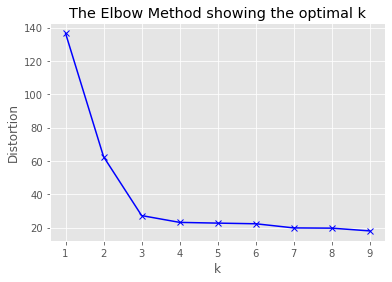

In [52]:
from scipy.spatial.distance import cdist

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=0).fit(b_grouped_clustering)
    distortions.append(sum(np.min(cdist(b_grouped_clustering, kmeanModel.cluster_centers_, 'canberra'), axis=1)) / b_grouped_clustering.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.


In [53]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

b_merged = df_bru

#merg with df_bru to add latitude/longitude for each neighborhood
b_merged = b_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'),how='inner', on='Neighborhood')


b_merged

,Postalcode,Neighborhood,Municipalities,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1070,Anderlecht,Anderlecht,50.828925,4.289680,2,Park,Bus Stop,Supermarket,Tram Station,Bakery,Convenience Store,Soccer Field,Notary,Martial Arts School,Gastropub
1,1160,Auderghem,Auderghem,50.810671,4.437785,0,Soccer Field,Track,Brasserie,Tennis Court,Belgian Restaurant,French Restaurant,Plaza,Garden,Gymnastics Gym,Bakery
2,1082,Berchem-Sainte-Agathe,Berchem-Sainte-Agathe,50.865065,4.293591,1,Greek Restaurant,Supermarket,Tram Station,Notary,Snack Place,Gym,French Restaurant,Restaurant,Plaza,Burger Joint
3,1000,Ville de Bruxelles,Ville de Bruxelles,50.845973,4.366800,1,Italian Restaurant,Sandwich Place,Hotel,Belgian Restaurant,Thai Restaurant,Restaurant,Pizza Place,Plaza,Japanese Restaurant,Asian Restaurant
4,1040,Etterbeek,Etterbeek,50.834005,4.394064,1,Plaza,Pizza Place,Snack Place,Park,Gym / Fitness Center,Supermarket,Indian Restaurant,Concert Hall,Butcher,Chinese Restaurant
5,1140,Evere,Evere,50.867645,4.408936,2,Athletics & Sports,Park,Hockey Field,Bus Stop,Tram Station,Stadium,Supermarket,Sports Bar,Skate Park,Soccer Field
6,1190,Forest,Forest,50.814050,4.323961,2,Park,Steakhouse,Movie Theater,Supermarket,Brasserie,Music Venue,Chinese Restaurant,Tennis Court,Lounge,Bus Stop
7,1083,Ganshoren,Ganshoren,50.873825,4.308504,1,Bus Station,Bar,Plaza,Friterie,Boutique,Pizza Place,Deli / Bodega,Pharmacy,Chinese Restaurant,Castle
8,1050,Ixelles,Ixelles,50.820555,4.388028,1,Bar,Vietnamese Restaurant,French Restaurant,Italian Restaurant,Thai Restaurant,Women's Store,Salad Place,Food Service,Chinese Restaurant,Coffee Shop
9,1090,Jette,Jette,50.879480,4.328711,1,Platform,Bar,Gastropub,Snack Place,Gym / Fitness Center,Bakery,Park,Mini Golf,Market,Restaurant


Finally, let's visualize the resulting clusters


In [54]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(b_merged['Latitude'], b_merged['Longitude'], b_merged['Neighborhood'], b_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

## Examine Clusters


#### Cluster 0


In [55]:
b_merged.loc[b_merged['Cluster Labels'] == 0, b_merged.columns[[1] + list(range(5, b_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Auderghem,0,Soccer Field,Track,Brasserie,Tennis Court,Belgian Restaurant,French Restaurant,Plaza,Garden,Gymnastics Gym,Bakery


#### Cluster 1


In [56]:
b_merged.loc[b_merged['Cluster Labels'] == 1, b_merged.columns[[1] + list(range(5, b_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Berchem-Sainte-Agathe,1,Greek Restaurant,Supermarket,Tram Station,Notary,Snack Place,Gym,French Restaurant,Restaurant,Plaza,Burger Joint
3,Ville de Bruxelles,1,Italian Restaurant,Sandwich Place,Hotel,Belgian Restaurant,Thai Restaurant,Restaurant,Pizza Place,Plaza,Japanese Restaurant,Asian Restaurant
4,Etterbeek,1,Plaza,Pizza Place,Snack Place,Park,Gym / Fitness Center,Supermarket,Indian Restaurant,Concert Hall,Butcher,Chinese Restaurant
7,Ganshoren,1,Bus Station,Bar,Plaza,Friterie,Boutique,Pizza Place,Deli / Bodega,Pharmacy,Chinese Restaurant,Castle
8,Ixelles,1,Bar,Vietnamese Restaurant,French Restaurant,Italian Restaurant,Thai Restaurant,Women's Store,Salad Place,Food Service,Chinese Restaurant,Coffee Shop
9,Jette,1,Platform,Bar,Gastropub,Snack Place,Gym / Fitness Center,Bakery,Park,Mini Golf,Market,Restaurant
10,Koekelberg,1,Gym,Bar,French Restaurant,Park,Falafel Restaurant,Sandwich Place,Convenience Store,Piano Bar,Gym / Fitness Center,History Museum
11,Molenbeek-Saint-Jean,1,Supermarket,Pizza Place,Chinese Restaurant,Brasserie,Tanning Salon,Pastry Shop,Park,Food Court,Castle,Snack Place
12,Saint-Gilles,1,Brasserie,Plaza,Bar,Greek Restaurant,Pizza Place,Portuguese Restaurant,Gym / Fitness Center,BBQ Joint,Bakery,Italian Restaurant
13,Saint-Josse-ten-Noode,1,Italian Restaurant,Concert Hall,Pizza Place,Sandwich Place,Restaurant,Plaza,Kebab Restaurant,Bus Station,Convenience Store,Kids Store


#### Cluster 2


In [57]:
b_merged.loc[b_merged['Cluster Labels'] == 2, b_merged.columns[[1] + list(range(5, b_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Anderlecht,2,Park,Bus Stop,Supermarket,Tram Station,Bakery,Convenience Store,Soccer Field,Notary,Martial Arts School,Gastropub
5,Evere,2,Athletics & Sports,Park,Hockey Field,Bus Stop,Tram Station,Stadium,Supermarket,Sports Bar,Skate Park,Soccer Field
6,Forest,2,Park,Steakhouse,Movie Theater,Supermarket,Brasserie,Music Venue,Chinese Restaurant,Tennis Court,Lounge,Bus Stop
15,Uccle,2,Park,Bus Stop,Train Station,Office,Trail,Convenience Store,Asian Restaurant,Plaza,Escape Room,Electronics Store
18,Woluwe-Saint-Pierre,2,Park,Bus Stop,Grocery Store,Toy / Game Store,Sports Club,Museum,Lounge,Bar,French Restaurant,Trail
